$\text{}$

$$\LARGE\text{Assignment: Distances and LSH}$$

$$\large\text{Qianlang Chen (u1172983)}$$

$$\text{CS 5140 Spring 2021}$$

$\text{}$

# Problem 1

## Part A

In [4]:
import math

t = 160
tau = .65

b = -math.log(t, tau)
r = t / b
print(f'b = {b}\nr = {r}')

b = 11.781279214295948
r = 13.58086817990432


## Part B

In [57]:
import numpy

sim = numpy.array((
    (  1, .72, .35, .15, .55),
    (.72,   1, .42, .85, .44),
    (.35, .42,   1, .25, .50),
    (.15, .85, .25,   1, .66),
    (.55, .44, .50, .66,   1),
))
names = ('A', 'B', 'C', 'D', 'E')

for i in range(len(names) - 1):
    for j in range(i + 1, len(names)):
        expr = f'1 - (1 - {sim[i][j]:.4f}**{b:.4f})**{r:.4f}'
        print(f'Pr[{names[i]} and {names[j]} are similar] = {expr} ='
              f' {eval(expr):.4f}')

Pr[A and B are similar] = 1 - (1 - 0.7200**11.7813)**13.5809 = 0.2489
Pr[A and C are similar] = 1 - (1 - 0.3500**11.7813)**13.5809 = 0.0001
Pr[A and D are similar] = 1 - (1 - 0.1500**11.7813)**13.5809 = 0.0000
Pr[A and E are similar] = 1 - (1 - 0.5500**11.7813)**13.5809 = 0.0118
Pr[B and C are similar] = 1 - (1 - 0.4200**11.7813)**13.5809 = 0.0005
Pr[B and D are similar] = 1 - (1 - 0.8500**11.7813)**13.5809 = 0.8853
Pr[B and E are similar] = 1 - (1 - 0.4400**11.7813)**13.5809 = 0.0009
Pr[C and D are similar] = 1 - (1 - 0.2500**11.7813)**13.5809 = 0.0000
Pr[C and E are similar] = 1 - (1 - 0.5000**11.7813)**13.5809 = 0.0039
Pr[D and E are similar] = 1 - (1 - 0.6600**11.7813)**13.5809 = 0.0970


$\pagebreak$

# Problem 2

## Part A

We can achieve this by using a Gaussian Distribution with the help of the Box-Muller Transform:

* Define $\vec{u} = (u_1, u_2, \cdots, u_{12})$, where $u_i \leftarrow \text{Unif}(0, 1)$

* Let $\vec{v} = (v_1, v_2, \cdots, v_{12})$, where:
  * If $i$ is odd, $v_i = \sqrt{-2\ln(u_i)}\cos(2\pi u_{i+1})$
  * If $i$ is even, $v_i = \sqrt{-2\ln(u_{i-1})}\sin(2\pi u_i)$

* Return $\vec{v}/||\vec{v}||_2$

## Part B

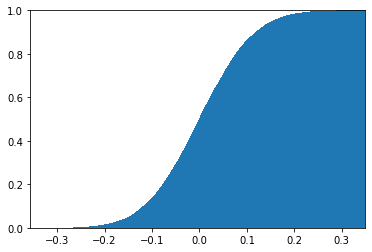

In [114]:
import math
import numpy
from matplotlib import pyplot

def random_unit_vector(d):
    u = numpy.random.uniform(0, 1, d)
    v = numpy.empty(d)
    for i in range(0, d, 2):
        v[i] = (math.sqrt(-2 * math.log(u[i]))
                * math.cos(2 * math.pi * u[i + 1]))
    for i in range(1, d, 2):
        v[i] = (math.sqrt(-2 * math.log(u[i - 1]))
                * math.sin(2 * math.pi * u[i]))
    return v / numpy.linalg.norm(v, 2)

d = 120
t = 200
V = tuple(random_unit_vector(d) for _ in range(t))
X = tuple(V[i] @ V[j] for i in range(t - 1) for j in range(i + 1, t))

pyplot.margins(0, 0)
_ = pyplot.hist(X, 1000, cumulative=True, density=1)

$\pagebreak$

# Problem 3

In [100]:
import math
import numpy

R = numpy.genfromtxt('data/R.csv', delimiter=',')
print(R.shape)
n, d = R.shape

def s_ang(a, b):
    a_bar = a / numpy.linalg.norm(a, 2)
    b_bar = b / numpy.linalg.norm(b, 2)
    return 1 - math.acos(a_bar @ b_bar) / math.pi

(450, 100)


## Part A

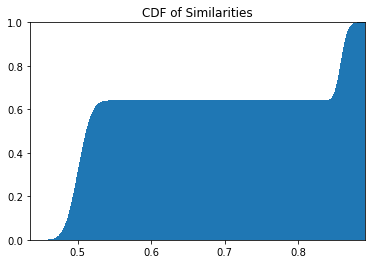

In [115]:
from matplotlib import pyplot

sim = tuple(s_ang(R[i], R[j])
            for i in range(n - 1) for j in range(i + 1, n))

pyplot.title('CDF of Similarities')
pyplot.margins(0, 0)
_ = pyplot.hist(sim, 1000, cumulative=True, density=1)

In [75]:
tau = .8
print(f'{sum(x >= tau for x in sim):,} pairs have similarity >= {tau}')

36,226 pairs have similarity >= 0.8


## Part B

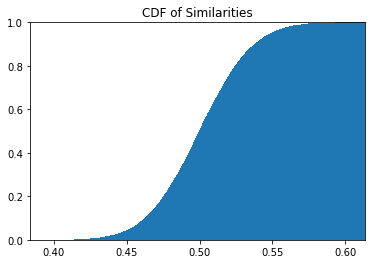

In [117]:
sim = tuple(s_ang(V[i], V[j])
            for i in range(t - 1) for j in range(i + 1, t))

pyplot.title('CDF of Similarities')
pyplot.margins(0, 0)
_ = pyplot.hist(sim, 1000, cumulative=True, density=1)

In [90]:
tau = .75
print(f'{sum(x >= tau for x in sim):,} pairs have similarity >= {tau}')

0 pairs have similarity >= 0.75


$\pagebreak$

# Problem 4

In [110]:
import math
import numpy

t = 160
tau = .75

def lsh(x, y, U, b, r, tau):
    eta = numpy.random.uniform(0, tau)
    return any(all((numpy.ceil(x @ U[i * b + j] + eta)
                    == numpy.ceil(y @ U[i * b + j] + eta))
                   for j in range(b))
               for i in range(r))

b = -math.log(t, tau)
r = math.floor(t / b)
b = math.floor(b)
U = tuple(random_unit_vector(d) for _ in range(r * b))

s = sum(lsh(R[i], R[j], U, b, r, tau)
        for i in range(n - 1) for j in range(i + 1, n))
print(f'Proportion of pairs with similarity >= {tau}:'
      f' {s / (n * (n - 1) / 2)}')

Proportion of pairs with similarity >= 0.75: 0.8594803266518188
